In [4]:
##Delivery_time -> Predict delivery time using sorting time 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [19]:
Data= pd.read_csv("C:/Users/Vijay Rathod/Downloads/delivery_time.csv")
Data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [32]:
data1=Data.rename({'Delivery Time':'delivery_time'},axis=1)
data2= data1.rename({'Sorting Time':'sorting_time'},axis=1)
data2

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [33]:
# check weather there is any null value or not
data2.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [ ]:
## Here our "Y" is Delivery time And our "X" is Sorting time.

In [34]:
# finding correlation for X and Y variyable
data2.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

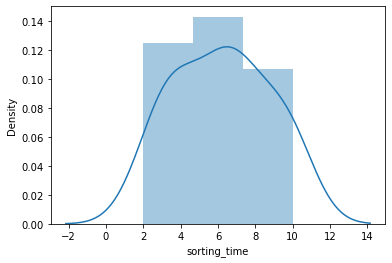

In [36]:
## to see the nature of data we plot it
sns.distplot(data2['sorting_time'])

In [38]:
# fitting Linnear Regression Model
model= smf.ols("delivery_time~sorting_time",data=data2).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        16:43:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

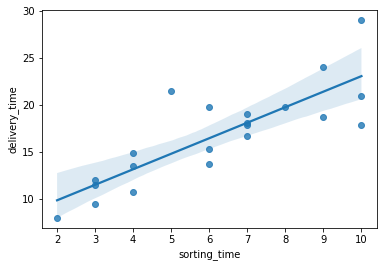

In [52]:
sns.regplot(x='sorting_time',y= 'delivery_time',data=data2)

In [47]:
## testing our Model for sorting time 8
new_data=pd.Series([8])
new=pd.DataFrame(new_data,columns=['sorting_time'])
model.predict(new)


0    19.774893
dtype: float64

In [50]:
## for predicting for our all Sorting columns we use
model.predict(data2)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64